,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


'Preprocessed'

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,67,1,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,1
2,67,1,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0


'Min-Max Scaling'

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,0.708333,1,3,0.481132,0.286638,1,0,0.603053,0,0.370968,0,0.000000,0,0
1,0.791667,1,0,0.622642,0.400862,0,0,0.282443,1,0.241935,1,1.000000,1,1
2,0.791667,1,0,0.245283,0.278017,0,0,0.442748,1,0.419355,1,0.666667,2,1
3,0.166667,1,2,0.339623,0.323276,0,1,0.885496,0,0.564516,0,0.000000,1,0
4,0.250000,0,1,0.339623,0.224138,0,0,0.770992,0,0.225806,2,0.000000,1,0


'Standard Scaling'

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,0.940446,1,3,0.749760,-0.262867,1,0,0.029124,0,1.069475,0,-0.718306,0,0
1,1.384143,1,0,1.596354,0.747722,0,0,-1.790447,1,0.380309,1,2.487269,1,1
2,1.384143,1,0,-0.661231,-0.339138,0,0,-0.880662,1,1.327912,1,1.418744,2,1
3,-1.943588,1,2,-0.096835,0.061285,0,1,1.632079,0,2.103224,0,-0.718306,1,0
4,-1.499891,0,1,-0.096835,-0.815830,0,0,0.982232,0,0.294163,2,-0.718306,1,0



Q1: How does changing K affect classification accuracy?
Observations: Extreme K values tend to overfit, while K=5 has higher accuracy.


,3,5,7,9
MinMax,0.850000,0.850000,0.833333,0.816667
Standard,0.816667,0.866667,0.816667,0.833333


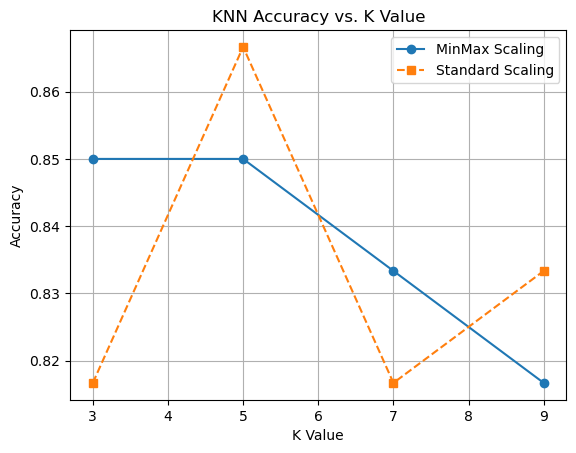


Q2: Which normalization technique improves KNN performance?
Answer: Standard scaling resulted in higher accuracy for K=5.

Q3: Which class is more often misclassified?
More False Negatives: The model fails to detect at-risk patients, which is more critical.
Adjustments: We can change the decision threshold or weight classes to reduce this error.


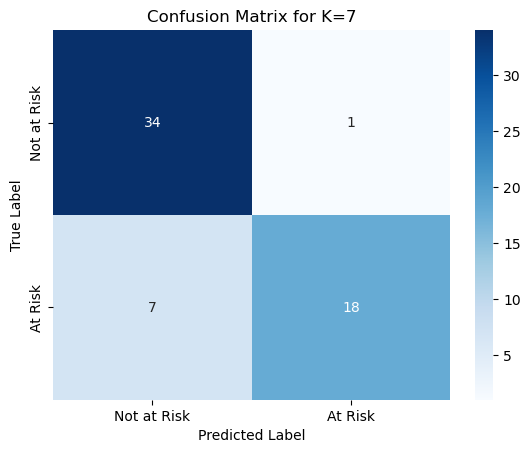

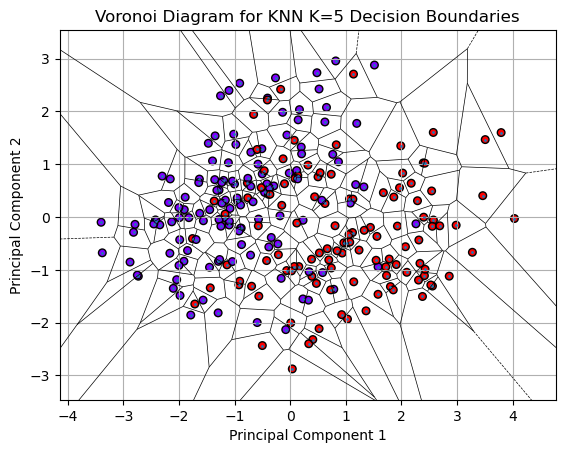

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

from scipy.spatial import Voronoi, voronoi_plot_2d

df = pd.read_csv("../heart_disease_uci.csv")
display(df.head())

df.dropna(inplace=True) #drop rows containing null values
df = df.drop(columns=['id', 'dataset']) #drop unwanted cols
df['num'] = (df['num'] > 0).astype(int) #num(target) converted to binary 0->0  1,2,3,4->1

num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

df[cat_cols] = df[cat_cols].apply(LabelEncoder().fit_transform) #converting string classes to numerical 0,1,2,...

df_minmax, df_standard = df.copy(), df.copy() #copying dataframe
df_minmax[num_cols]   = MinMaxScaler().fit_transform(df_minmax[num_cols]) #minmax scaling
df_standard[num_cols] = StandardScaler().fit_transform(df_standard[num_cols]) #standard scaling

display("Preprocessed", df.head())
display("Min-Max Scaling", df_minmax.head())
display("Standard Scaling", df_standard.head())

X_minmax, X_standard, y = df_minmax.iloc[:, :-1], df_standard.iloc[:, :-1], df['num']

#train-test split for df_minmax, df_standard
X_train_minmax, X_test_minmax, y_train, y_test = train_test_split(X_minmax, y, test_size=0.2, random_state=42)
X_train_standard, X_test_standard, _, _ = train_test_split(X_standard, y, test_size=0.2, random_state=42)

# Train and evaluate KNN for different K values
k_values = [3, 5, 7, 9]
results = {}

for k in k_values:
    #minmax scaled fit
    knn_minmax = KNeighborsClassifier(n_neighbors=k)
    knn_minmax.fit(X_train_minmax, y_train)
    acc_minmax = accuracy_score(y_test, knn_minmax.predict(X_test_minmax))

    #standard scaled fit
    knn_standard = KNeighborsClassifier(n_neighbors=k)
    knn_standard.fit(X_train_standard, y_train)
    acc_standard = accuracy_score(y_test, knn_standard.predict(X_test_standard))

    #accuracy stored in dictionary for different k values for choosing best
    results[k] = {'MinMax': acc_minmax, 'Standard': acc_standard}

# Print KNN Accuracy Results
print("\nQ1: How does changing K affect classification accuracy?")
print("Observations: Extreme K values tend to overfit, while K=5 has higher accuracy.")
display(pd.DataFrame(results))

# Plot accuracy trends
plt.plot(k_values, [results[k]['MinMax'] for k in k_values], marker='o', linestyle='-', label="MinMax Scaling")
plt.plot(k_values, [results[k]['Standard'] for k in k_values], marker='s', linestyle='--', label="Standard Scaling")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs. K Value")
plt.legend()
plt.grid()
plt.show()

print(f"\nQ2: Which normalization technique improves KNN performance?")
print(f"Answer: Standard scaling resulted in higher accuracy for K=5.")

# Best model: KNN with K=5 and Standard Scaling
best_knn = KNeighborsClassifier(n_neighbors=5)
best_knn.fit(X_train_standard, y_train)
y_pred = best_knn.predict(X_test_standard)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print misclassification analysis
fp = conf_matrix[0][1]  # False Positives
fn = conf_matrix[1][0]  # False Negatives
print(f"\nQ3: Which class is more often misclassified?")
if fp > fn:
    print("More False Positives: The model incorrectly predicts patients as at-risk when they are not.")
else:
    print("More False Negatives: The model fails to detect at-risk patients, which is more critical.")
print("Adjustments: We can change the decision threshold or weight classes to reduce this error.")

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not at Risk', 'At Risk'], yticklabels=['Not at Risk', 'At Risk'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for K=7')
plt.show()

# PCA for 2D visualization
X_pca = PCA(n_components=2).fit_transform(X_train_standard)
KNeighborsClassifier(n_neighbors=5).fit(X_pca, y_train)

# Generate Voronoi diagram
vor = Voronoi(X_pca)
voronoi_plot_2d(vor, show_vertices=False, line_colors='black', line_width=0.5, point_size=2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='rainbow', edgecolors='k', marker='o', s=30)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Voronoi Diagram for KNN K=5 Decision Boundaries")
plt.grid()
plt.show()